In [5]:
import requests

with open("example_index", "wb") as f:
    r = requests.get("https://webdatacommons.org/hyperlinkgraph/data/example_index")
    f.write(r.content)

with open("example_arcs", "wb") as f:
    r = requests.get("https://webdatacommons.org/hyperlinkgraph/data/example_arcs")
    f.write(r.content)


In [6]:
import numpy as np

nodes = np.loadtxt("example_index", dtype=object)[:,0]
num_nodes = nodes.shape[0]
edges = np.loadtxt("example_arcs", dtype=int)
num_edges = nodes.shape[0]

print(nodes)
print(edges)

['1000notes.com' '100500.tv' 'abebooks.com' 'abebooks.de'
 'amazon-presse.de' 'amazon.ca' 'amazon.cn' 'amazon.co.jp' 'amazon.co.uk'
 'amazon.com' 'amazon.de' 'amazon.es' 'amazon.fr' 'amazon.it'
 'angrybirds.com' 'animationplayhouse.com' 'apple.com' 'audible.com'
 'audible.de' 'automattic.com' 'azspot.net' 'beautybar.com'
 'blogalaxia.com' 'blogg.se' 'blogia.com' 'blogspot.com'
 'bookdepository.co.uk' 'bookdepository.com' 'buyvip.com' 'canalblog.com'
 'carambatv.ru' 'classicalvalues.com' 'creativecommons.org'
 'cubicle17.com' 'cyprien.fr' 'diapers.com' 'disqus.com'
 'downthisvideo.com' 'dpreview.com' 'drdrum.com'
 'eltangoysusinvitados.com' 'endless.com' 'fabric.com' 'facebook.com'
 'flickr.com' 'flickr.net' 'gmpg.org' 'goodreads.com' 'google.com'
 'histats.com' 'hockeyfights.com' 'icecastles.com' 'imdb.com' 'imdb.de'
 'img-dpreview.com' 'instagr.am' 'javari.de' 'javari.jp' 'joblo.com'
 'kenyaunlimited.com' 'linkwithin.com' 'livejournal.com' 'lockerz.com'
 'lovefilm.de' 'memeorandum.com

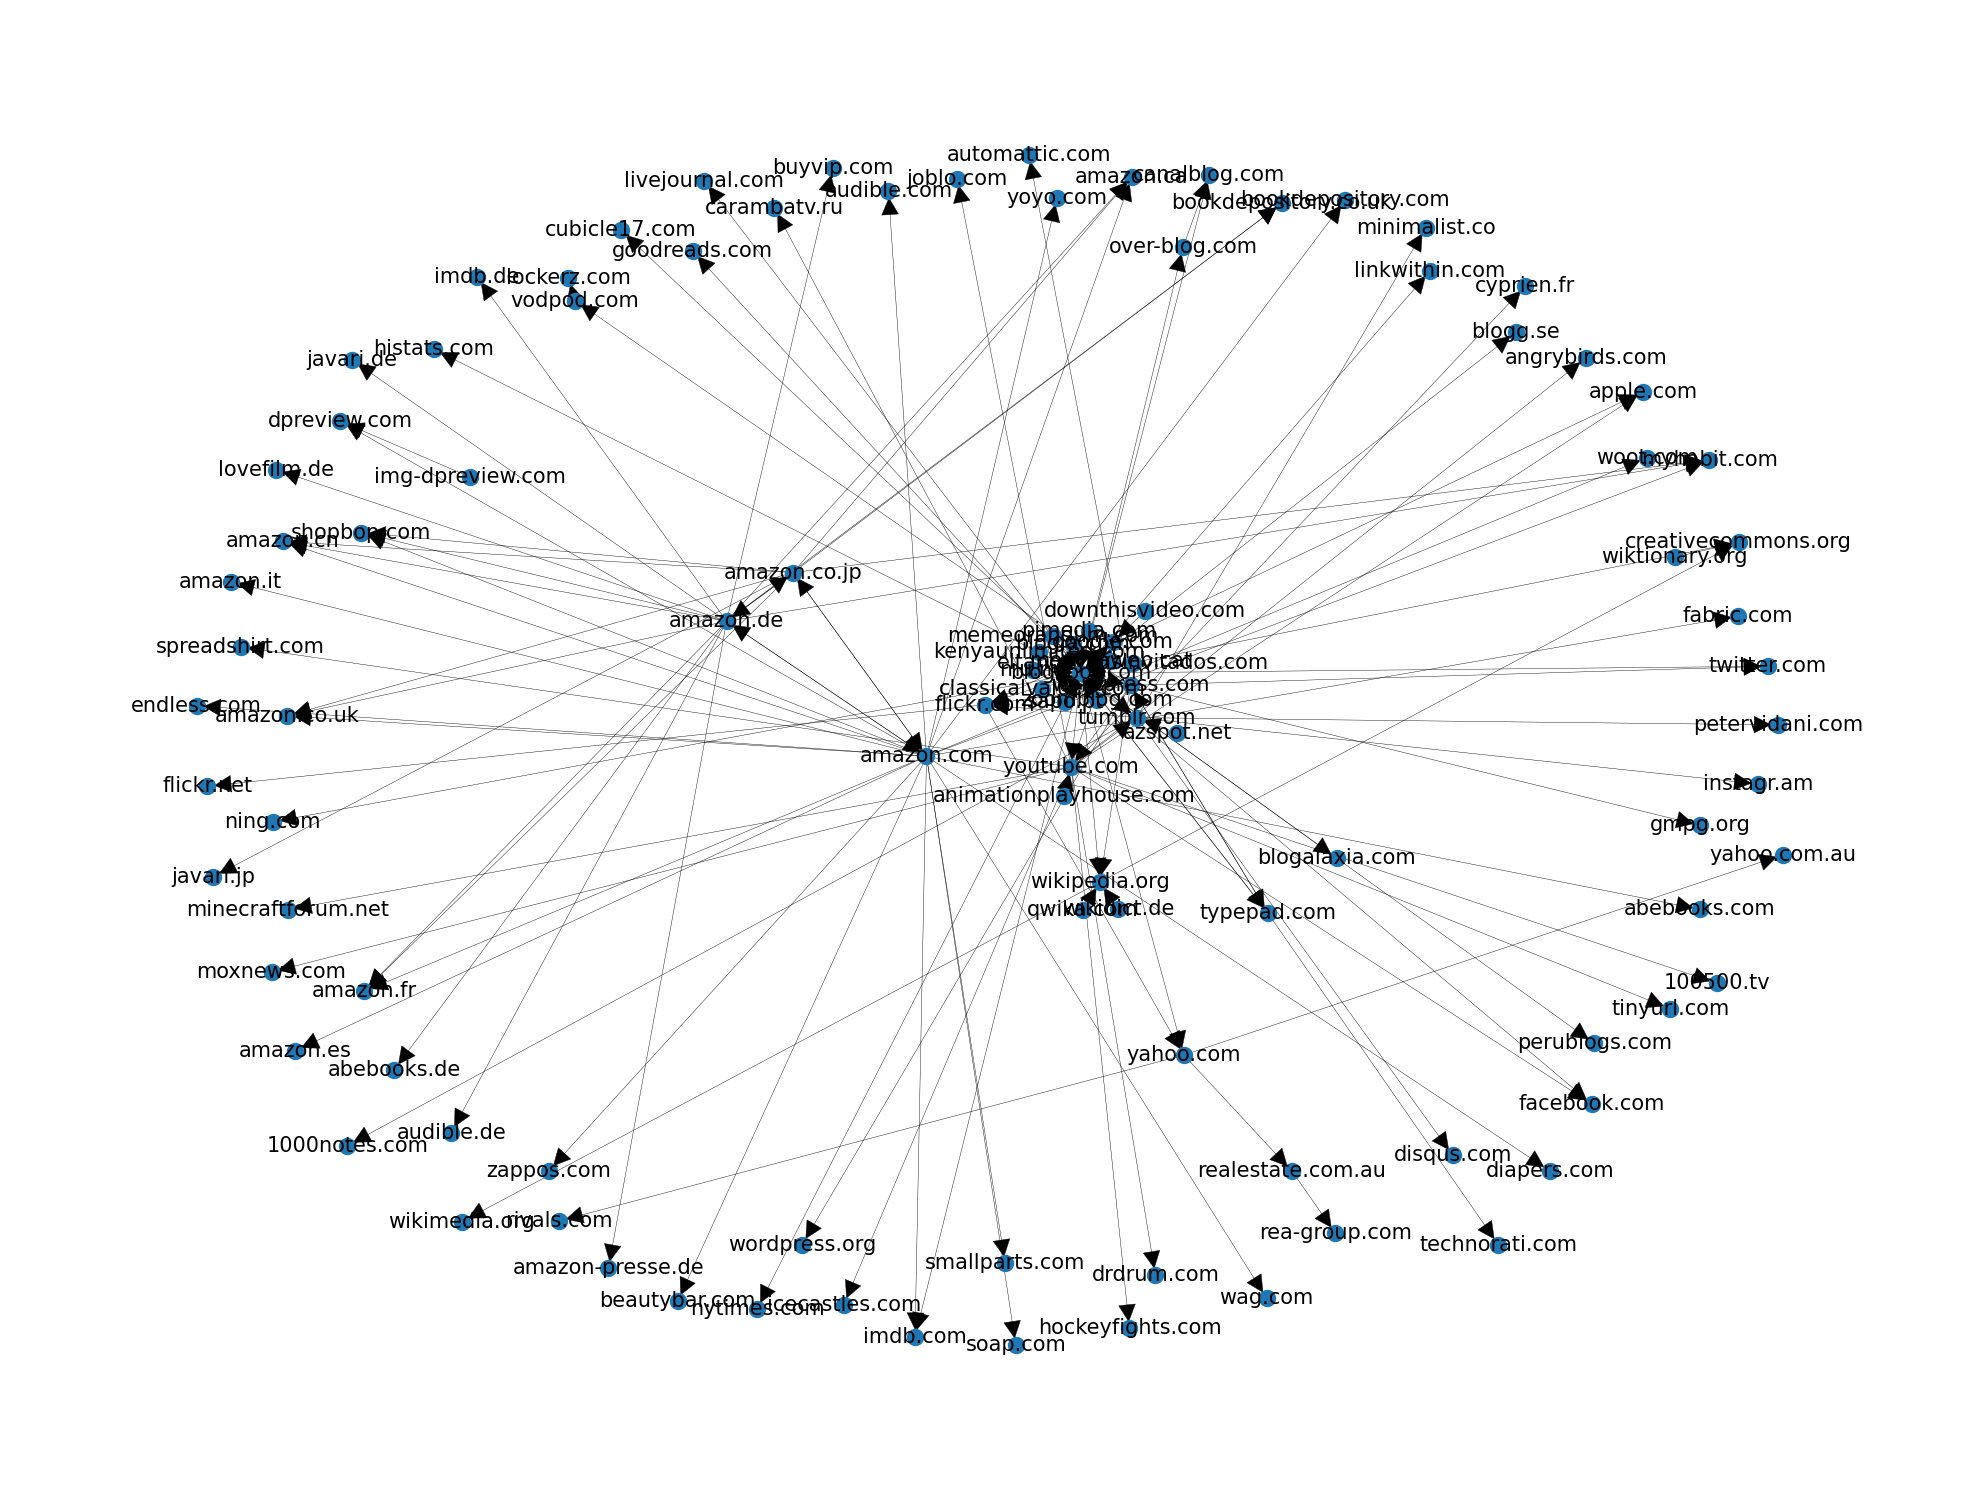

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(dpi=300)
G = nx.DiGraph()

for u, v in edges:
    G.add_edge(nodes[u], nodes[v])

nx.draw(G, with_labels = True, node_size=10, font_size=5, width=0.1)

In [ ]:
# pagerank에 들어가는 0.8은 teleport가 되지 않는 확률
# 기본값 0.85
r = nx.pagerank(G)
6
r = sorted(r.items(), key=lambda x: x[1], reverse=True)

for i in r[:10]:
    print(i)

('blogspot.com', 0.08542425762544206)
('creativecommons.org', 0.024220103814991234)
('wikipedia.org', 0.021582586522641486)
('canalblog.com', 0.017730661911958275)
('youtube.com', 0.016119265401656313)
('tumblr.com', 0.015904254686443048)
('google.com', 0.015904254686443048)
('wikimedia.org', 0.015599528017970031)
('rea-group.com', 0.015057970139281873)
('yahoo.com', 0.013150763969634)


In [22]:
def pagerank(edges, n_nodes,beta=0.85, n_epochs=100):
    
    d = [0] * n_nodes
    
    for u, v in edges:
        d[u] += 1
    
    r = [1/n_nodes] * n_nodes
    
    for _ in range(n_epochs):
        r_next = [(1-beta) / n_nodes] * n_nodes
    
        for u, v in edges:
            r_next[v] += beta * r[u] / d[u]
            
        r_next_sum = sum(r_next)
        for u in range(n_nodes):
            r_next[u] += (1-r_next_sum) / n_nodes
            
        r = r_next

    return r
              
        

In [23]:
r = pagerank(edges, num_nodes)
for item in sorted((zip(r, nodes)), reverse=True)[:10]:
    print(item) 


(0.08542594911159555, 'blogspot.com')
(0.02422019737380686, 'creativecommons.org')
(0.021582303280083363, 'wikipedia.org')
(0.01773120753338568, 'canalblog.com')
(0.01611902130484473, 'youtube.com')
(0.01590404148659131, 'tumblr.com')
(0.01590404148659131, 'google.com')
(0.015599869453139698, 'wikimedia.org')
(0.01505780846024519, 'rea-group.com')
(0.013150737408590827, 'yahoo.com')
